# 아주대학교 기계공학과 수치해석과 기계학습 - B007 - 2 (강대식 교수님)
## 기계공학과 201920144 서경덕

코딩은 캐글이 아닌 코랩으로 진행하였습니다. (캐글로 진행하려고 했으나, 속도가 느려서 코랩으로 진행한 점 이해해주셨으면 좋겠습니다.)  
코랩은 한글인식이 안되기 때문에 그래프에 한글로 넣기 위해서 다음과 같이 작업하였습니다. 주피터 노트북으로 실행하실경우 다음과 같은 문장은 빼셔도 무관합니다.

In [1]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
  import matplotlib.pyplot as plt

  plt.rc('font', family='NanumBarunGothic')

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno

In [5]:
test = pd.read_csv('../tmp/test.csv')
train = pd.read_csv('../tmp/train.csv')

In [6]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
train_new = train.select_dtypes(include='object').columns.tolist()

In [10]:
train_new

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [11]:
train_new_ver = train.select_dtypes(exclude='object').columns.tolist()

In [12]:
train_new_ver

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported']

In [13]:
train_new_ver = train_new_ver[:-1]
train_new_ver

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [14]:
train.shape

(8693, 14)

In [15]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [16]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [17]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [18]:
test.shape

(4277, 13)

In [19]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [20]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [21]:
train['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [22]:
train['Age'].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

### 결측지 제거 합

In [23]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### nunique() 함수를 활용해 변수의 개수 추출

In [24]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

### True: 탑승자, False: 미탑승자

Text(0.5, 1.0, 'HomePlanet에 따른 분석')

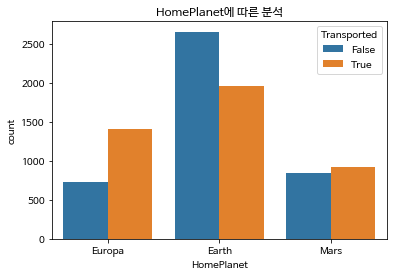

In [25]:
sns.countplot(data=train, x="HomePlanet", hue="Transported")
plt.title('HomePlanet에 따른 분석')

Text(0.5, 1.0, 'HomePlanet에 따른 분석')

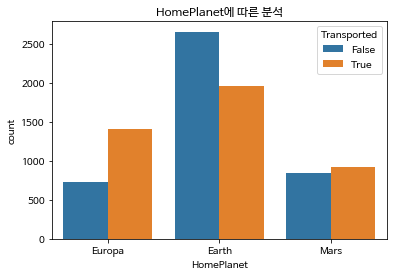

In [26]:
sns.countplot(data=train, x="HomePlanet", hue="Transported")
plt.title('HomePlanet에 따른 분석')

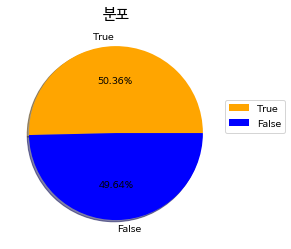

In [27]:
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
plt.pie(train['Transported'].value_counts(), labels=['True', 'False'], autopct='%.2f%%', colors=['orange', 'blue'], shadow = True)
plt.title('분포', size = 15)
plt.legend(loc = (1, 0.5))
plt.show()

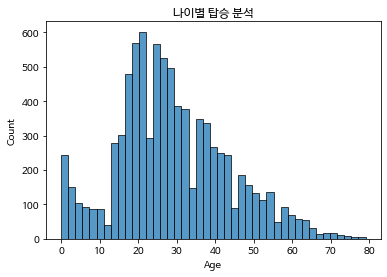

In [28]:
sns.histplot(data=train, x='Age')
plt.title('나이별 탑승 분석')
plt.show()

### HomePlanet에 따른 분석

In [29]:
train['HomePlanet'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8693, dtype: object>

Text(0.5, 1.0, 'HomePlanet에 따른 분석')

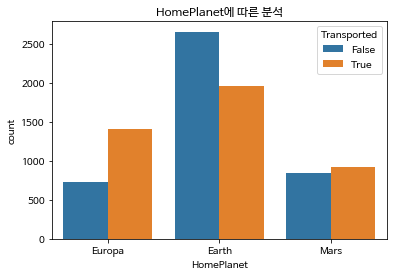

In [30]:
sns.countplot(data=train, x="HomePlanet", hue="Transported")
plt.title('HomePlanet에 따른 분석')

### VIP의 수 분석

Text(0.5, 1.0, 'VIP에 따른 분석')

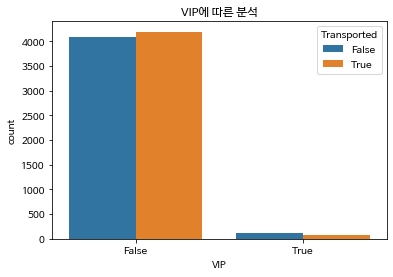

In [31]:
sns.countplot(data=train, x= 'VIP', hue= 'Transported')
plt.title('VIP에 따른 분석')

### CryoSleep에 따른 분석

Text(0.5, 1.0, 'CryoSleep에 따른 분석')

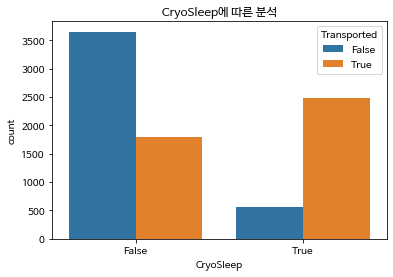

In [32]:
sns.countplot(data=train, x= 'CryoSleep', hue= 'Transported')
plt.title('CryoSleep에 따른 분석')

### Destination에 따른 분류

Text(0.5, 1.0, 'Destination에 따른 분석')

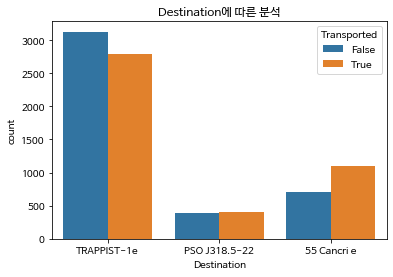

In [33]:
sns.countplot(data=train, x= 'Destination', hue= 'Transported')
plt.title('Destination에 따른 분석')

### 데이터 분석

In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [35]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer, SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [36]:
X_train_full = pd.read_csv("../tmp/train.csv", index_col="PassengerId")
X_test_full = pd.read_csv("../tmp/test.csv", index_col="PassengerId")

X_train_full.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [37]:
X_train_full = X_train_full.dropna(axis=0, subset=["Transported"])
X = X_train_full.drop("Transported", axis=1)
y = X_train_full["Transported"]

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=48)

In [39]:
col_numeric = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and X_train_full[cname].dtype == "object"]

In [40]:
my_cols = col_numeric + categorical_cols
X_train = X_train[my_cols]
X_valid = X_valid[my_cols]
X_test = X_test_full[my_cols]

In [41]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP
PassengerId,,,,,,,,,,
0528_01,46.0,0.0,1119.0,0.0,3427.0,6595.0,Europa,False,TRAPPIST-1e,False
6816_02,28.0,944.0,0.0,0.0,0.0,75.0,Earth,False,TRAPPIST-1e,NaN
5184_01,0.0,0.0,0.0,0.0,0.0,0.0,Earth,False,TRAPPIST-1e,False
4219_03,32.0,1331.0,416.0,0.0,665.0,64.0,Mars,False,TRAPPIST-1e,False
8986_02,22.0,0.0,17.0,0.0,620.0,0.0,Earth,False,PSO J318.5-22,False


In [42]:
X_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP
PassengerId,,,,,,,,,,
0013_01,27.0,0.0,0.0,0.0,0.0,0.0,Earth,True,TRAPPIST-1e,False
0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,Earth,False,TRAPPIST-1e,False
0019_01,31.0,0.0,0.0,0.0,0.0,0.0,Europa,True,55 Cancri e,False
0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,Europa,False,TRAPPIST-1e,False
0023_01,20.0,10.0,0.0,635.0,0.0,0.0,Earth,False,TRAPPIST-1e,False


In [43]:
X_train.isnull().sum()

Age             142
RoomService     144
FoodCourt       135
ShoppingMall    157
Spa             140
VRDeck          136
HomePlanet      149
CryoSleep       173
Destination     144
VIP             159
dtype: int64

In [44]:
X_valid.isnull().sum()

Age             37
RoomService     37
FoodCourt       48
ShoppingMall    51
Spa             43
VRDeck          52
HomePlanet      52
CryoSleep       44
Destination     38
VIP             44
dtype: int64

In [45]:
X_test.isnull().sum()

Age              91
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
HomePlanet       87
CryoSleep        93
Destination      92
VIP              93
dtype: int64

결측치를 채워줍니다. 데이터 타입이 실수인 feature라면 학습 데이터셋을 구성하는 데이터들에서 해당 feature의 평균값을 구해 train set, validation set, test set의 결측치를 채워줍니다. 데이터 타입이 카테고리인 feature라면 최빈값을 구해 결측치를 채워줍니다.

In [46]:
def fill_mean(features, train, valid, test):
    for feature in features:
        mean = train[feature].mean()
        train[feature] = train[feature].fillna(mean)
        valid[feature] = valid[feature].fillna(mean)
        test[feature] = test[feature].fillna(mean)
    return train, valid, test

In [47]:
def fill_mode(features, train, valid, test):
    for feature in features:
        mode = train[feature].mode()
        train[feature] = train[feature].fillna(mode.item())
        valid[feature] = valid[feature].fillna(mode.item())
        test[feature] = test[feature].fillna(mode.item())
    return train, valid, test

In [48]:
X_train, X_valid, X_test = fill_mean(col_numeric, X_train, X_valid, X_test)
X_train, X_valid, X_test = fill_mode(categorical_cols, X_train, X_valid, X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
X_train.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
dtype: int64

In [50]:
X_valid.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
dtype: int64

In [51]:
X_test.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
dtype: int64

In [52]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP
PassengerId,,,,,,,,,,
0528_01,46.0,0.0,1119.0,0.0,3427.0,6595.0,Europa,False,TRAPPIST-1e,False
6816_02,28.0,944.0,0.0,0.0,0.0,75.0,Earth,False,TRAPPIST-1e,False
5184_01,0.0,0.0,0.0,0.0,0.0,0.0,Earth,False,TRAPPIST-1e,False
4219_03,32.0,1331.0,416.0,0.0,665.0,64.0,Mars,False,TRAPPIST-1e,False
8986_02,22.0,0.0,17.0,0.0,620.0,0.0,Earth,False,PSO J318.5-22,False


In [53]:
X_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP
PassengerId,,,,,,,,,,
0013_01,27.0,0.0,0.0,0.0,0.0,0.0,Earth,True,TRAPPIST-1e,False
0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,Earth,False,TRAPPIST-1e,False
0019_01,31.0,0.0,0.0,0.0,0.0,0.0,Europa,True,55 Cancri e,False
0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,Europa,False,TRAPPIST-1e,False
0023_01,20.0,10.0,0.0,635.0,0.0,0.0,Earth,False,TRAPPIST-1e,False


케테고리 feature에 대해서 one-hot encoding을 적용해줍니다.

1. 원-핫 인코딩(One-Hot Encoding)이란?  
원-핫 인코딩은 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식입니다. 이렇게 표현된 벡터를 원-핫 벡터(One-Hot vector)라고 합니다.  
('https://wikidocs.net/22647' 참고하였습니다.)

In [54]:
def one_hot(features, data):
    for feature in features:
        if len(data[feature].value_counts()) ==2:
            data[feature].replace({False : 0, True : 1}, inplace = True)
        else:
            x = pd.get_dummies(data[feature])
            data = pd.concat([data, x], axis=1)
            data = data.drop(feature, axis=1)
    return data

In [55]:
X_train = one_hot(categorical_cols, X_train)
X_valid = one_hot(categorical_cols, X_valid)
X_test = one_hot(categorical_cols, X_test)

In [56]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
PassengerId,,,,,,,,,,,,,,
0528_01,46.0,0.0,1119.0,0.0,3427.0,6595.0,0,0,0,1,0,0,0,1
6816_02,28.0,944.0,0.0,0.0,0.0,75.0,0,0,1,0,0,0,0,1
5184_01,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1
4219_03,32.0,1331.0,416.0,0.0,665.0,64.0,0,0,0,0,1,0,0,1
8986_02,22.0,0.0,17.0,0.0,620.0,0.0,0,0,1,0,0,0,1,0


In [57]:
X_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
PassengerId,,,,,,,,,,,,,,
0013_01,27.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,1
0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,1,0,0,0,0,1
0019_01,31.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,0
0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,0,0,0,1,0,0,0,1
0023_01,20.0,10.0,0.0,635.0,0.0,0.0,0,0,1,0,0,0,0,1


In [58]:
estimator = XGBClassifier(random_state=48)

params = {
    "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900],
    "learning_rate": [0.01, 0.05, 0.1, 0.5]
}

model = GridSearchCV(estimator=estimator, param_grid=params, cv=3, scoring="accuracy", verbose=3)

In [59]:
model.fit(X_train, y_train)

preds = model.predict(X_valid)

accuracy = accuracy_score(y_valid,preds)

print(f"Accuracy: {accuracy}")
print(f"Best parameters: {model.best_params_}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END learning_rate=0.01, n_estimators=100;, score=0.764 total time=   0.3s
[CV 2/3] END learning_rate=0.01, n_estimators=100;, score=0.762 total time=   0.3s
[CV 3/3] END learning_rate=0.01, n_estimators=100;, score=0.754 total time=   0.3s
[CV 1/3] END learning_rate=0.01, n_estimators=200;, score=0.785 total time=   0.5s
[CV 2/3] END learning_rate=0.01, n_estimators=200;, score=0.782 total time=   0.5s
[CV 3/3] END learning_rate=0.01, n_estimators=200;, score=0.793 total time=   0.5s
[CV 1/3] END learning_rate=0.01, n_estimators=300;, score=0.789 total time=   0.8s
[CV 2/3] END learning_rate=0.01, n_estimators=300;, score=0.786 total time=   0.8s
[CV 3/3] END learning_rate=0.01, n_estimators=300;, score=0.793 total time=   0.8s
[CV 1/3] END learning_rate=0.01, n_estimators=400;, score=0.792 total time=   1.0s
[CV 2/3] END learning_rate=0.01, n_estimators=400;, score=0.789 total time=   1.0s
[CV 3/3] END learning_rat

In [60]:
best_model = XGBClassifier(n_estimators=400, learning_rate=0.01, random_state=48)
best_model.fit(X_train, y_train)
valid_preds = model.predict(X_valid)
valid_accuracy = accuracy_score(y_valid,valid_preds)
print(f"Valid Accuracy: {valid_accuracy}")

Valid Accuracy: 0.796688132474701


In [61]:
test_preds = model.predict(X_test)

In [62]:
df_sub = pd.read_csv("../tmp/sample_submission.csv")
df_sub.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [63]:
print(test_preds)

[ True False  True ...  True  True  True]


In [64]:
print(type(df_sub.iloc[0, 1]))

<class 'numpy.bool_'>


In [65]:
length = len(df_sub)
for i in range(length):
    if test_preds[i] == 1:
        pred_label = "True"
    else:
        pred_label = "False"
    df_sub.iloc[i, 1] = pred_label

In [66]:
df_sub.to_csv("./submisson.csv", index=False)